In [3]:
import numpy as np
import pandas as pd
import scipy.io as sio
import os

In [ ]:
# original site seems to be permantly offline, using cached data
#!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/97.mat
#!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/98.mat
#!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/99.mat
#!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/100.mat
#!wget https://github.com/IBM/skillsnetwork/raw/master/coursera_ai/week3/data/cwr_healthy/97.mat
#!wget https://github.com/IBM/skillsnetwork/raw/master/coursera_ai/week3/data/cwr_healthy/98.mat
#!wget https://github.com/IBM/skillsnetwork/raw/master/coursera_ai/week3/data/cwr_healthy/99.mat
#!wget https://github.com/IBM/skillsnetwork/raw/master/coursera_ai/week3/data/cwr_healthy/100.mat

In [ ]:
!mkdir  cwr_healthy

In [ ]:
!mv *.mat cwr_healthy/

In [4]:
def read_folder(folder):
    data = 'dummy'
    skip = False
    for file in os.listdir(folder):
        file_id = file[:-4]
        mat_file_dict = sio.loadmat(folder+file)
        del data
        for key, value in mat_file_dict.items():
            if 'DE_time' in key or 'FE_time' in key:
                a = np.array(mat_file_dict[key])
                try:
                    data
                except NameError:
                    data = a
                else:
                    if (data.shape[0] != a.shape[0]):
                        print('skipping ' + file_id)
                        skip = True
                        continue
                    data = np.hstack((data,a))
        if skip:
            skip=False
            continue
        id = np.repeat(file_id,data.shape[0])
        id.shape = (id.shape[0],1)
        data = np.hstack((id,data))
        if data.shape[1] == 2:
            zeros = np.repeat(float(0),data.shape[0])
            zeros.shape =(data.shape[0],1)
            data = np.hstack((data,zeros))
        try:
            result
        except NameError:
            result = data
        else:
            result = np.vstack((result,data))
    return result

In [5]:
result_healthy = read_folder('./cwr_healtcazz/')

In [6]:
pdf = pd.DataFrame(result_healthy)

In [7]:
pdf.to_csv('result_healthy_pandas.csv', header=False, index=True)

In [ ]:
# uncommented because way too much data
#!for url in `curl -s csegroups.case.edu/bearingdatacenter/pages/12k-drive-end-bearing-fault-data |grep mat |grep http |awk -F'href="' '{print $2}' |awk -F'">' '{print $1}'`; do wget $url; done
#!for url in `curl -s csegroups.case.edu/bearingdatacenter/pages/48k-drive-end-bearing-fault-data |grep mat |grep http |awk -F'href="' '{print $2}' |awk -F'">' '{print $1}'`; do wget $url; done
#!for url in `curl -s csegroups.case.edu/bearingdatacenter/pages/12k-fan-end-bearing-fault-data |grep mat |grep http |awk -F'href="' '{print $2}' |awk -F'">' '{print $1}'`; do wget $url; done
#!mkdir cwr_faulty
#!mv *.mat cwr_faulty/

In [ ]:
# original site seems to be permantly offline, using cached data
# !wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/105.mat
# !wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/106.mat
# !wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/107.mat
# !wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/108.mat
#!wget https://github.com/IBM/skillsnetwork/raw/master/coursera_ai/week3/data/cwr_faulty/105.mat
#!wget https://github.com/IBM/skillsnetwork/raw/master/coursera_ai/week3/data/cwr_faulty/106.mat
#!wget https://github.com/IBM/skillsnetwork/raw/master/coursera_ai/week3/data/cwr_faulty/107.mat
!wget https://github.com/IBM/skillsnetwork/raw/master/coursera_ai/week3/data/cwr_faulty/108.mat

In [ ]:
!mkdir cwr_faulty
!mv *.mat cwr_faulty/

In [ ]:
!ls cwr_faulty/

In [8]:
result_faulty = read_folder('./cwr_faulty/')

In [9]:
pdf = pd.DataFrame(result_faulty)

In [10]:
pdf.to_csv('result_faulty_pandas.csv', header=False, index=True)

In [10]:
import base64
from ibm_botocore.client import Config
import ibm_boto3
import time

# In order to obtain the correct values for "credentias", "bucket_name" and "endpoint" 
# please follow the tutorial at https://github.com/IBM/skillsnetwork/wiki/Cloud-Object-Storage-Setup

credentials = {
  "apikey": "ctAtCPLp9elDJZUjPZEPCJxN-V6MuMgACGJuVJOg2UJu",
  "cos_hmac_keys": {
    "access_key_id": "6c2bbc3e12744d9788291e424e909bc9",
    "secret_access_key": "6b1615944c9fbd5718aaac9261e5de5c1d6f67245ea694aa"
  },
  "endpoints": "https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints",
  "iam_apikey_description": "Auto-generated for key 6c2bbc3e-1274-4d97-8829-1e424e909bc9",
  "iam_apikey_name": "ApacheSpark",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/a5c7062ccd8a4ac39ef2b6df4fa698a1::serviceid:ServiceId-7c114795-028e-4aad-9f3c-9f4cead09be0",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/a5c7062ccd8a4ac39ef2b6df4fa698a1:9872889b-e7cf-4d41-ae4c-f50e39bcae6d::"
}


bucket_name = 'apachesparkferna'
endpoint = 'https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints'

In [11]:
# Create client 
client = ibm_boto3.client(
    's3',
    aws_access_key_id = credentials["cos_hmac_keys"]['access_key_id'],
    aws_secret_access_key = credentials["cos_hmac_keys"]["secret_access_key"],
    endpoint_url=endpoint
)




client.upload_file('result_healthy_pandas.csv',bucket_name, 'result_healthy_pandas.csv')
client.upload_file('result_faulty_pandas.csv',bucket_name, 'result_faulty_pandas.csv')

S3UploadFailedError: Failed to upload result_healthy_pandas.csv to apachesparkferna/result_healthy_pandas.csv: An error occurred (404) when calling the CreateMultipartUpload operation: Not Found

In [ ]:
# Create client 
client = ibm_boto3.client(
    's3',
    aws_access_key_id = credentials["cos_hmac_keys"]['access_key_id'],
    aws_secret_access_key = credentials["cos_hmac_keys"]["secret_access_key"],
    endpoint_url=endpoint
)



client.download_file(bucket_name,'result_healthy_pandas.csv', 'result_healthy_pandas.csv')
client.download_file(bucket_name,'result_faulty_pandas.csv', 'result_faulty_pandas.csv')

In [11]:
import pandas as pd
df_healthy = pd.read_csv('result_healthy_pandas.csv', engine='python', header=None)
df_healthy.head()

,0,1,2,3
0,0,97,0.053197,0.145667
1,1,97,0.088662,0.097796
2,2,97,0.099718,0.054856
3,3,97,0.058621,0.036982
4,4,97,-0.004590,0.054445


In [12]:
df_healthy.loc[df_healthy[1] == 100]

,0,1,2,3


In [13]:
df_faulty = pd.read_csv('result_faulty_pandas.csv', engine='python', header=None)
df_faulty.head()

,0,1,2,3
0,0,203,-0.124752,0.017875
1,1,203,-0.129133,-0.019313
2,2,203,-0.132054,-0.027942
3,3,203,-0.118911,-0.024449
4,4,203,-0.078022,0.002876


In [42]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
import tensorflow.keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

In [22]:
def get_recording(df,file_id):
    return np.array(df.sort_values(by=0, ascending=True).loc[df[1] == file_id].drop(0,1).drop(1,1))

In [23]:
import numpy as np
healthy_sample = get_recording(df_healthy,100)
faulty_sample = get_recording(df_faulty,125)

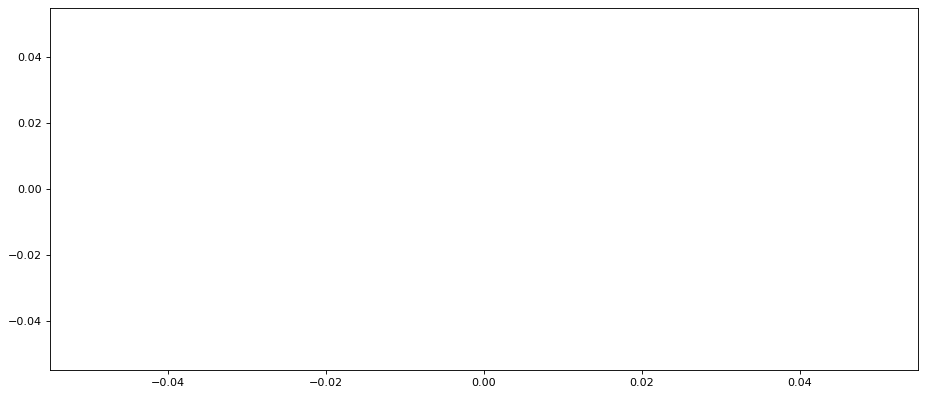

In [24]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,size), healthy_sample[:,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), healthy_sample[:,1], '-', color='blue', animated = True, linewidth=1)

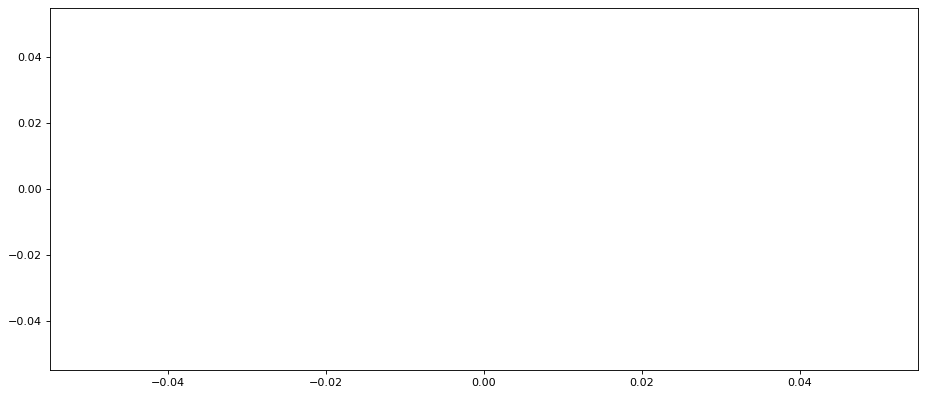

In [25]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(faulty_sample)
ax.plot(range(0,size), faulty_sample[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), faulty_sample[:,0], '-', color='blue', animated = True, linewidth=1)

ValueError: x and y must have same first dimension, but have shapes (500,) and (0,)

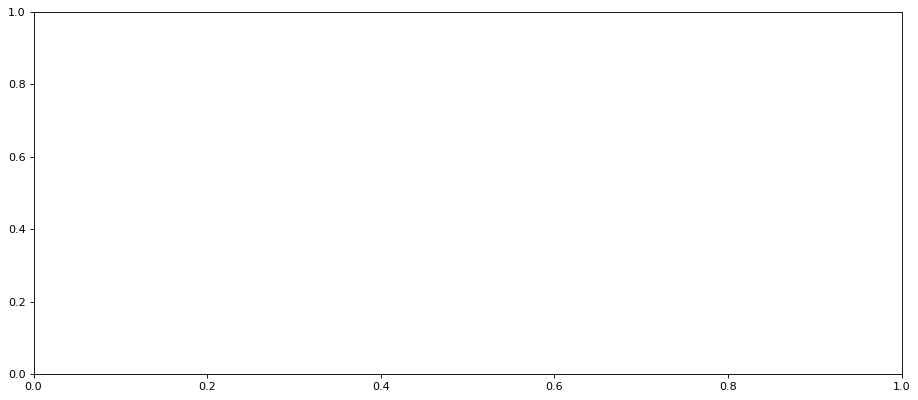

In [26]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), healthy_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), healthy_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

ValueError: x and y must have same first dimension, but have shapes (500,) and (0,)

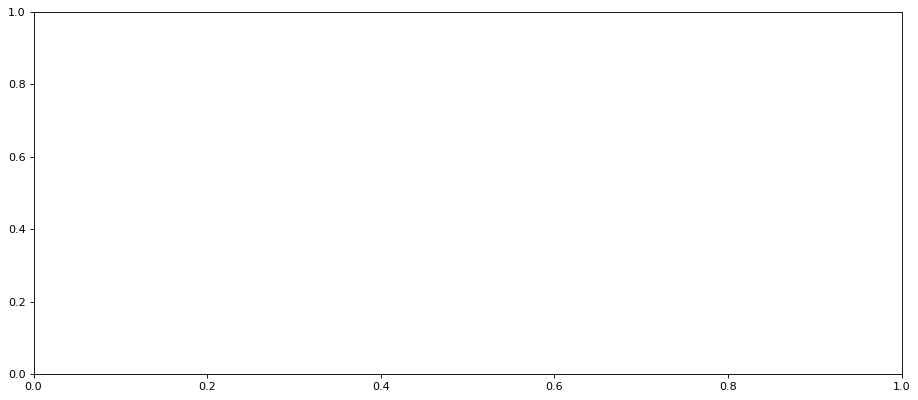

In [27]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), faulty_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), faulty_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

In [38]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [40]:
timesteps = 100
dim = 2
lossHistory = LossHistory()
# design network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')

def train(data):
    model.fit(data, data, epochs=20, batch_size=72, validation_data=(data, data), verbose=1, shuffle=False,callbacks=[lr])

def score(data):
    yhat =  model.predict(data)
    return yhat

In [30]:
#some learners constantly reported 502 errors in Watson Studio. 
#This is due to the limited resources in the free tier and the heavy resource consumption of Keras.
#This is a workaround to limit resource consumption

from keras import backend as K

#K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))
K.set_session(K.tf.compat.v1.Session(config=K.tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [31]:
def create_trimmed_recording(df,file_id):
    recording = get_recording(df,file_id) 
    samples = len(recording)
    trim = samples % 100
    recording_trimmed = recording[:samples-trim]
    recording_trimmed.shape = (int((samples-trim)/timesteps),timesteps,dim)
    return recording_trimmed

In [32]:
#pd.unique()
#df_healthy.drop(0,1).drop(2,1).drop(3,1)
pd.unique(df_healthy.iloc[:,1])

array([97], dtype=int64)

In [43]:
file_ids = pd.unique(df_healthy.iloc[:,1])
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_healthy,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
healthy_losses = lr.losses

Staring training on 97
Epoch 1/20
34/34 [==============================] - 3s 87ms/step - loss: 0.0532 - val_loss: 0.045864342877268791,0.05940468981862068,0.05903489887714386,0.058622006326913834,0.05838002264499664,0.058194175362586975,0.0579981692135334,0.0578712522983551,0.05762519687414169,0.05738857388496399,0.057164594531059265,0.05694221705198288,0.05666879564523697,0.056392841041088104,0.05615653097629547,0.05598734691739082,0.055812276899814606,0.05565440282225609,0.05552169308066368,0.05530722439289093,0.0551331453025341,0.05498102679848671,0.05479433014988899,0.054632361978292465,0.054476603865623474,0.054340798407793045,0.05417417362332344,0.05398895591497421,0.053796473890542984,0.05358150973916054,0.0533469021320343,0.05317198112607002
Epoch 2/20
34/34 [==============================] - 2s 66ms/step - loss: 0.0357 - val_loss: 0.0268547116532921791,0.04516187310218811,0.0447869710624218,0.04437496140599251,0.044106412678956985,0.04388008639216423, 0.043647997081279755,0.0

AttributeError: 'LossHistory' object has no attribute 'losses'

In [44]:
healthy_losses = lr.losses

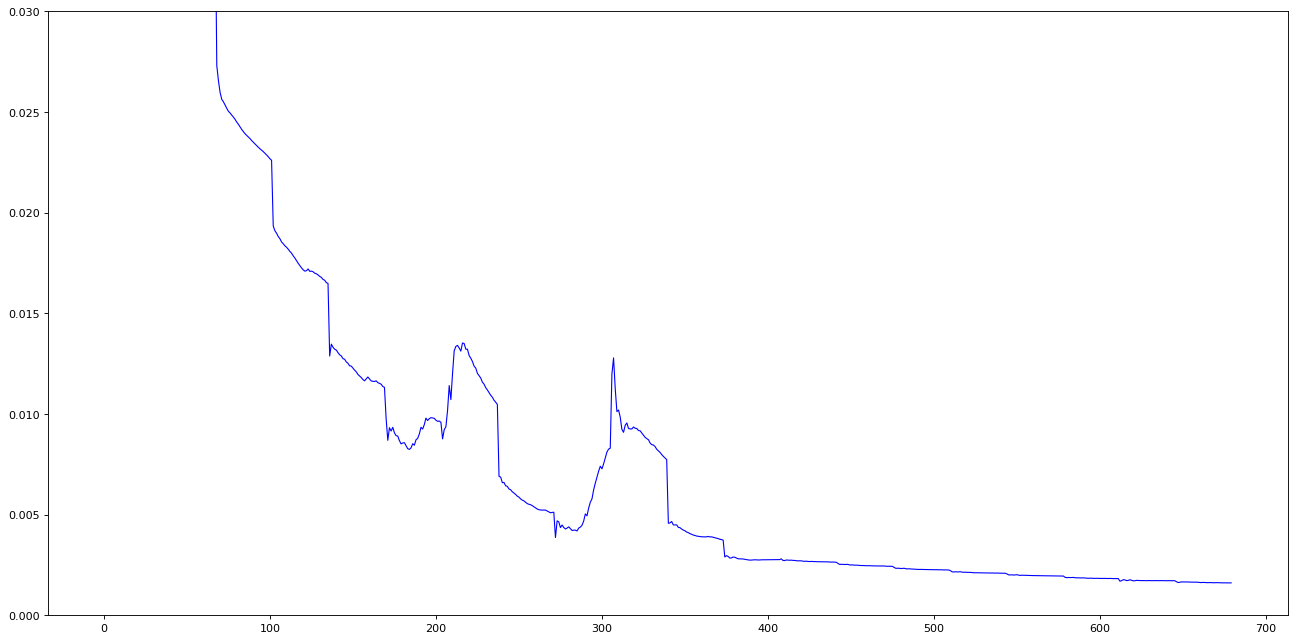

In [52]:
fig, ax = plt.subplots(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses)
plt.ylim(0,0.03)
ax.plot(range(0,size), healthy_losses, '-', color='blue', animated = True, linewidth=1)

In [54]:
#file_ids = spark.sql('select distinct _c1 from df_healhty').rdd.map(lambda row : row._c1).collect()
start = time.time()
for file_id in [203]:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
faulty_losses = lr.losses

Staring training on 203
Epoch 1/20
68/68 [==============================] - 4s 60ms/step - loss: 0.0022 - val_loss: 0.00190018391808262094855,0.001871961634606123,0.0018517866265028715,0.001851283828727901, 0.0018643122166395187,0.001846983446739614,0.0018507972126826644,0.0018546415958553553,0.001860351301729679, 0.0018947042990475893,0.0018844399601221085, 0.0018797594821080565,0.0018669113051146269, 0.0018599035684019327,0.00184910767711699,0.001853695954196155, 0.0018522789468988776,0.0018487219931557775, 0.0018601450137794018,0.0018601627089083195,0.0018567766528576612, 0.001869287109002471,0.0018601716728881001, 0.0018576565198600292,0.0018515174742788076,0.0018543947953730822,0.0018468862399458885,0.00185195985250175,0.0018468520138412714,0.0018415219383314252, 0.0018496147822588682,0.0018517653224989772, 0.0018630707636475563,0.001864745980128646, 0.0018913173116743565,0.001909926999360323,0.0019133428577333689, 0.0019300071289762855,0.0019358613062649965, 0.0019418437732383609

In [55]:
file_ids = pd.unique(df_faulty.iloc[:,1])
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
faulty_losses = lr.losses

Staring training on 203
Epoch 1/20
68/68 [==============================] - 5s 71ms/step - loss: 7.3889e-04 - val_loss: 5.9822e-0406994146109,0.001042320393025875,0.0009587508393451571,0.0009721568785607815,0.0009525553905405104,0.000943509628996253,0.0009470304939895868,0.0009174193837679923,0.0009081350872293115,0.0008856597705744207,0.0008799857459962368,0.0008568574558012187,0.0008587341289967299,0.0008489501196891069,0.000848363502882421,0.0008416963974013925,0.0008421357488259673,0.0008411743328906596,0.0008354683523066342,0.000829084892757237,0.0008267693337984383,0.0008199054864235222,0.0008247832302004099,0.0008273679413832724,0.0008213277906179428,0.0008198180585168302,0.0008124427986331284,0.0008048423915170133,0.0008042922709137201,0.0007979929796420038,0.0007996579515747726,0.0007964071701280773,0.0008012439357116818,0.000805387448053807,0.0007999110966920853,0.0008028077427297831,0.0008058161474764347,0.0008064465946517885,0.0008095671073533595,0.0008047752198763192,0.000

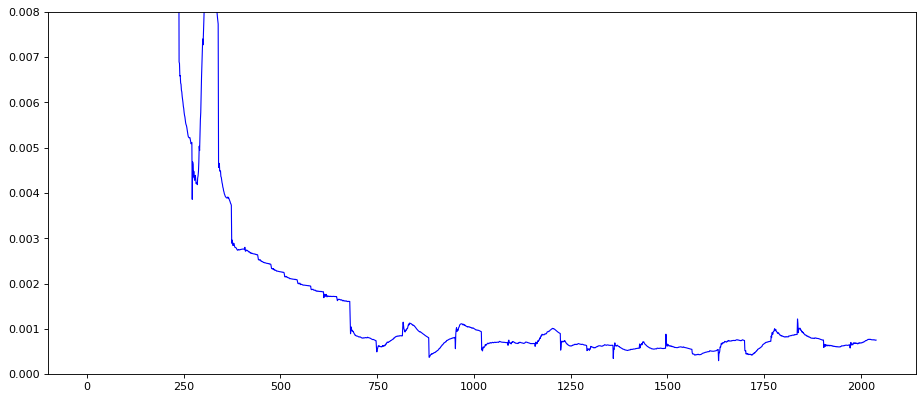

In [56]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses+faulty_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses+faulty_losses, '-', color='blue', animated = True, linewidth=1)